## 1. Setup enviorment

In [1]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [2]:
""" Read Dataset:"""
embeddings_dir = 'Embeddings/'
labels = '../Tabular_data/dengue_tabular.csv'

#Municipality='Medellín'

""" Dataset Preprocessing:"""
train_percentage = 70
T=3
autoregressive = False

""" Model Parameters:"""
lstm_layers=[1000, 500]
nn_layers=[250, 120, 1]
dense_acivation='relu'
recurrent_cells='LSTM'
bidirectional=False


## Create and Evaluate Model for a City

In [3]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True, fusion='late'):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
            else:
                rmse, mape, smape = rmse, mape, smapeevaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
        else:
            rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    
    return results

## Run Experiments

In [4]:
# Get list of embeddings:
def get_list_embeddings(embeddings_dir):
    embeddings_dir = 'Embeddings/'
    embeddings = []

    for embedding in os.listdir(embeddings_dir):
        embeddings.append(os.path.join(embeddings_dir, embedding))

    return embeddings

#embeddings = get_list_embeddings(embeddings_dir)
embeddings = 'Embeddings/ResNet50V2_224_1024.csv'

In [5]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
Obtaining dataframe for the city of 54001 - Cúcuta only...
The train shape is: (114, 2049)
The test shape is: (50, 2049)
The shape of the features is (111, 6147)
The shape of the labels is (111, 1)
The shape of the features is (47, 6147)
The shape of the labels is (47, 1)
The initial shapes are:
The train shape is (111, 6147)
The test shape is (47, 6147)
-----------------------
The Final sha

2023-02-21 21:27:49.796553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-21 21:27:49.796592: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-21 21:27:49.796615: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9f7bdfccc75e): /proc/driver/nvidia/version does not exist
2023-02-21 21:27:49.796818: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 21:27:52.146446: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00027: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_input (InputLayer)         [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_2_input (InputLayer)       [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 1)            15

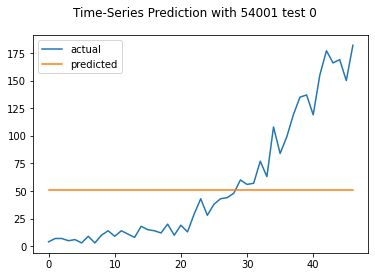

Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_4_input (InputLayer)       [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_6_input (InputLayer)       [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 1)            

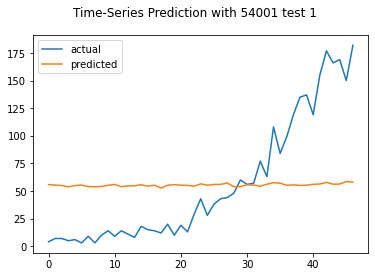

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_8_input (InputLayer)       [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_10_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 1)            

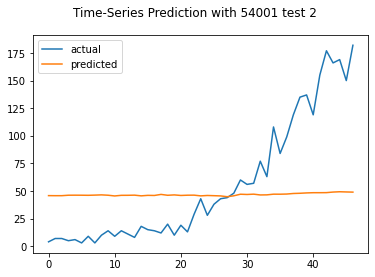

rmse : average=56.045, std=0.369
mape : average=279.840, std=21.479
smape : average=92.984, std=0.875
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
##########################################################################################

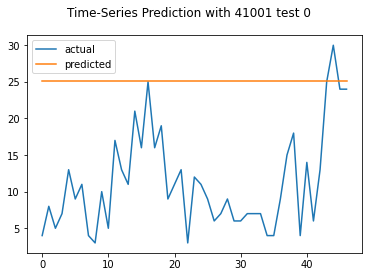

Restoring model weights from the end of the best epoch.
Epoch 00043: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00042: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_16_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_18_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 1)            15360971    lstm_16_input[0][0]              
______________________________________

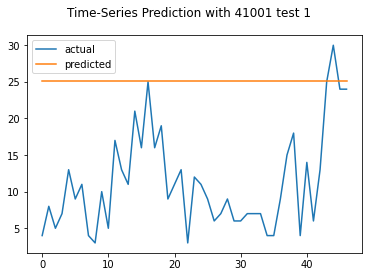

Restoring model weights from the end of the best epoch.
Epoch 00032: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00083: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_20_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_22_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_10 (Sequential)      (None, 1)            15360971    lstm_20_input[0][0]              
______________________________________

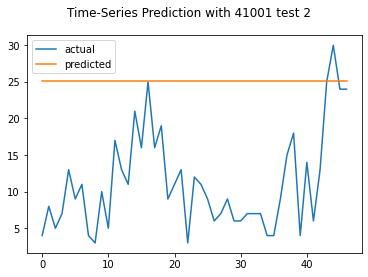

rmse : average=15.367, std=0.029
mape : average=216.489, std=0.395
smape : average=85.198, std=0.092
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
###########################################################################################

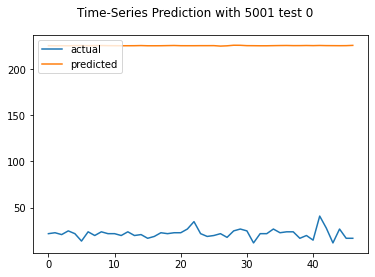

Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00082: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00025: early stopping
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_28_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_30_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_14 (Sequential)      (None, 1)            15360971    lstm_28_input[0][0]              
______________________________________

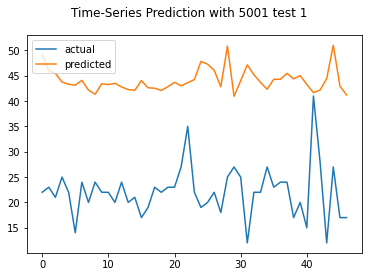

Restoring model weights from the end of the best epoch.
Epoch 00030: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_32_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_34_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_16 (Sequential)      (None, 1)            15360971    lstm_32_input[0][0]              
__________________________________________________________________________________________________
sequential_17 (Sequenti

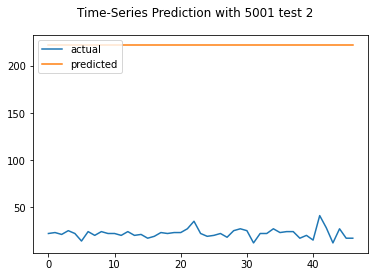

rmse : average=141.870, std=84.252
mape : average=679.429, std=402.535
smape : average=132.021, std=45.427
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
#####################################################################################

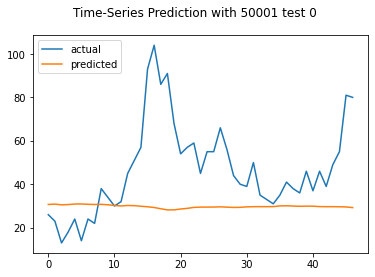

Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00025: early stopping
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_40_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_42_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_20 (Sequential)      (None, 1)           

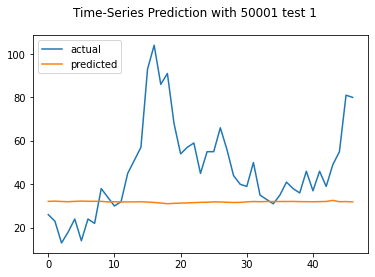

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_44_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_46_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_22 (Sequential)      (None, 1)           

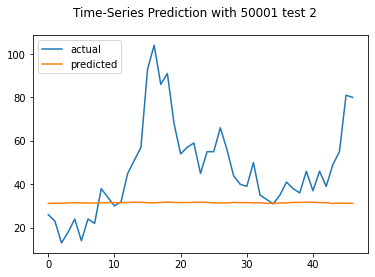

rmse : average=26.216, std=0.692
mape : average=38.884, std=1.114
smape : average=44.406, std=2.052
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Bucaramanga---------------------------------------------
############################################################################################

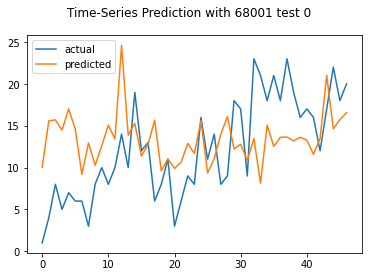

Restoring model weights from the end of the best epoch.
Epoch 00028: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_52_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_54_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_26 (Sequential)      (None, 1)            15360971    lstm_52_input[0][0]              
_____________________________________

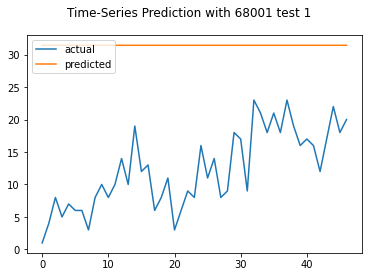

Restoring model weights from the end of the best epoch.
Epoch 00028: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00072: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_56_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_58_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_28 (Sequential)      (None, 1)            15360971    lstm_56_input[0][0]              
_____________________________________

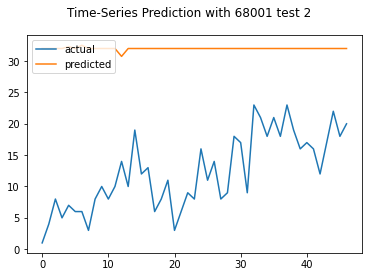

rmse : average=15.607, std=6.644
mape : average=222.951, std=101.481
smape : average=77.351, std=22.865
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
########################################################################################

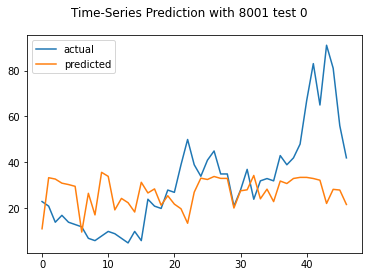

Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_64_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_66_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_32 (Sequential)      (None, 1)            15360971    lstm_64_input[0][0]              
_____________________________________

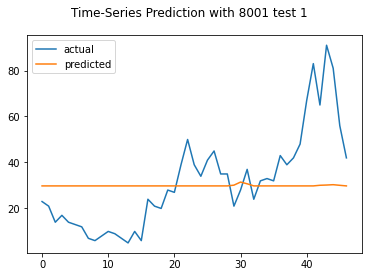

Restoring model weights from the end of the best epoch.
Epoch 00025: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00052: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00025: early stopping
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_68_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_70_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_34 (Sequential)      (None, 1)           

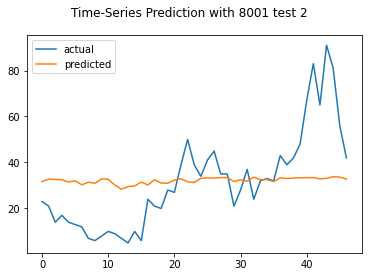

rmse : average=20.747, std=0.415
mape : average=90.605, std=7.070
smape : average=54.669, std=0.843
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
############################################################################################

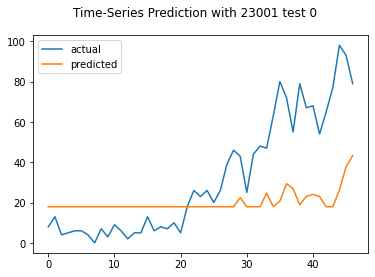

Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_76_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_78_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_38 (Sequential)      (None, 1)           

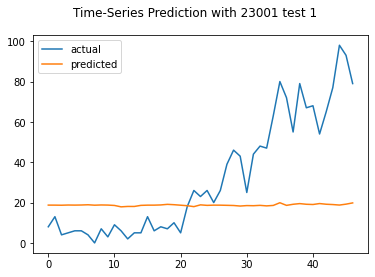

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_80_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_82_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_40 (Sequential)      (None, 1)           

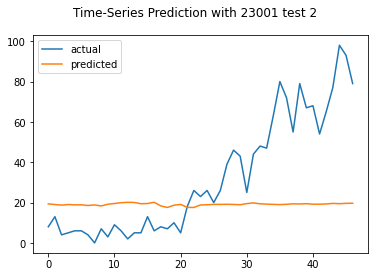

rmse : average=30.770, std=1.426
mape : average=inf, std=nan
smape : average=90.104, std=2.952
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
#################################################################################################

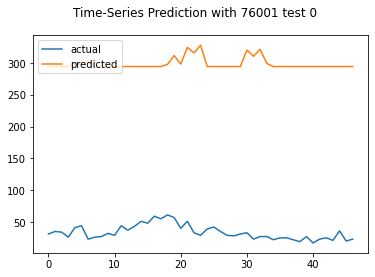

Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_88_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_90_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_44 (Sequential)      (None, 1)            15360971    lstm_88_input[0][0]              
_____________________________________

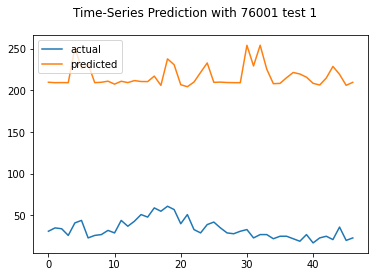

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_92_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_94_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_46 (Sequential)      (None, 1)           

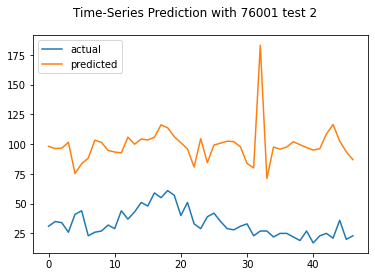

rmse : average=172.632, std=81.023
mape : average=576.056, std=270.502
smape : average=135.704, std=25.817
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
#####################################################################################

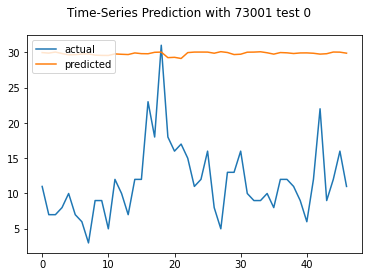

Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00045: early stopping
Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_100_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_102_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_50 (Sequential)      (None, 1)            15360971    lstm_100_input[0][0]             
__________________________________________________________________________________________________
sequential_51 (Sequent

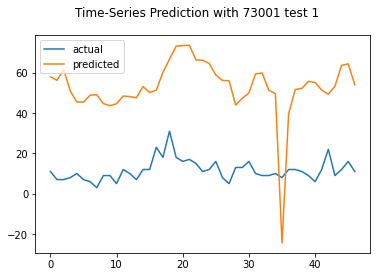

Restoring model weights from the end of the best epoch.
Epoch 00040: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00042: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_104_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_106_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_52 (Sequential)      (None, 1)            15360971    lstm_104_input[0][0]             
_____________________________________

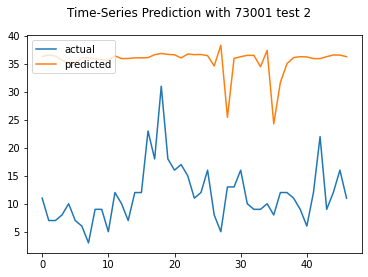

rmse : average=28.982, std=10.456
mape : average=309.053, std=101.779
smape : average=109.755, std=16.959
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
######################################################################################

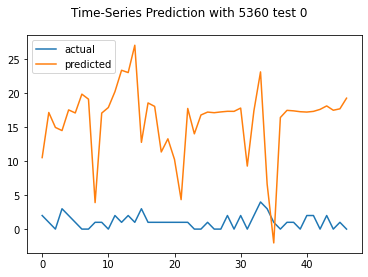

Restoring model weights from the end of the best epoch.
Epoch 00039: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_112_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_114_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_56 (Sequential)      (None, 1)            15360971    lstm_112_input[0][0]             
_____________________________________

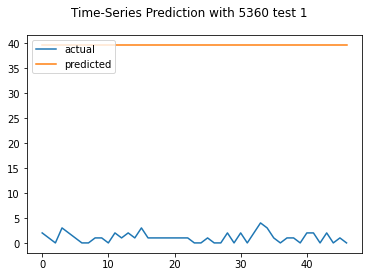

Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00040: early stopping
Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_116_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_118_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_58 (Sequential)      (None, 1)            15360971    lstm_116_input[0][0]             
_____________________________________

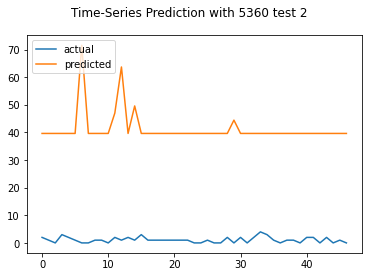

rmse : average=31.664, std=11.228
mape : average=inf, std=nan
smape : average=184.273, std=7.598
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [6]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True, fusion='late')

In [7]:
results

{54001: {'rmse': [56.04454747049721, 0.3687573847762503],
  'mape': [279.83982665490163, 21.47941511073782],
  'smape': [92.9843582494767, 0.8754845079426892]},
 41001: {'rmse': [15.366652566719923, 0.028649138262948456],
  'mape': [216.48928734299804, 0.39506482334978815],
  'smape': [85.19771161206133, 0.09184190901172137]},
 5001: {'rmse': [141.8701040882488, 84.25232982547284],
  'mape': [679.4292938554373, 402.535312592688],
  'smape': [132.02132950218495, 45.42663077336329]},
 50001: {'rmse': [26.21587528787981, 0.6922054115999685],
  'mape': [38.88437126998579, 1.1135104581971267],
  'smape': [44.40558040254823, 2.052492532730568]},
 68001: {'rmse': [15.607270063115529, 6.64430253090972],
  'mape': [222.9506560208546, 101.48077205581025],
  'smape': [77.35057814095707, 22.86544942401958]},
 8001: {'rmse': [20.746707504935525, 0.41532085769672833],
  'mape': [90.60534365164516, 7.07031624835073],
  'smape': [54.66927331308454, 0.8429829471566079]},
 23001: {'rmse': [30.7703642653